
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
> The TMDB movie data set contains information about 10000 movies collected from the The Movie Database(TMDB). It has 10,866 entries and 21 columns. This data set can used to analyze various factors that can contribute to the success of a movie.

> The Following are the details of the columns in the dataset.

 1. id: Unique id used to identify each movie
 2. imdb_id: IMDB id associated with the movie 
 3. popularity: Amount of interest the audience has in the movie
 4. budget: Finance/money spent for movie production
 5. revenue: Amount of money earned by the movie
 6. original_title: Title/name of the movie
 7. cast: List of actors in the movie
 8. homepage: webpage/URL of the movie 
 9. director: Person/people involved in making the movie
 10. tagline: Short decription of the movie
 11. keywords: Tags/short words decscribing the movie
 12. overview: Brief summary of the movie
 13. runtime: Duration of the movie
 14. genres: Category of the movie
 15. production_companies: Companies/Corporations involved the movie making
 16. release_date: Date on which movie is available to public for shows/viewing
 17. vote_count: Total number of votes movies received by users on TMDB
 18. vote_average: Average rating of the movie computed by used on TMDB
 19. release_year: Year in which movie was released to public
 20. budget_adj: Movie budget adjusted for inflation
 21. revenue_adj: Revenue of the movie adjusted for inflation


### Question(s) for Analysis

> Question 1: Which movie genres are the most popular?

> Question 2: Which movie genres have the highest average vote averages?

> Question 3: Which genres tend to be more popular?

> Question 4: What are the trends in average movie ratings over the years?

> Question 5: How average movie budget has changed over the years?

> Question 6: Identify variables that are related to the success of the movies  
    >> Q6.1: How revenue and budget are related ?
    >> Q6.2: How revenue and vote average are related ?
    >> Q6.3: If highly popular movies generate higher revenue ?
    >> Q6.4: If movie runtime have any impact on revenue ?
    >> Q6.5: Do movies with higher ratings tend to be more popular ?

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [80]:
# Load the dataset
df = pd.read_csv("tmdb-movies.csv")

### Check the shape of the dataframe

In [81]:
df.shape

(10866, 21)

### Check info about the dataframe 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Find the number of unique values for each column

In [83]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### View the first few rows of the dataframe

In [84]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Check the dataframe for null values in its columns

In [85]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Check the dataframe for duplicate values 

In [86]:
df.duplicated().sum()

1

### View basic statistics description of the dataset

In [87]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Check for invalid budget values

In [88]:
df.query("budget <= 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


### Check for invalid values for revenue

In [89]:
df.query("revenue <= 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


### Check for invalid values for runtime column

In [90]:
df.query("runtime <= 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0



## Data Cleaning
 

### Replace zero or invalid values in budget column with its mean

In [91]:
mean = df["budget"].mean()
df["budget"] = df["budget"].replace(0, mean)

In [92]:
df.query("budget <= 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Replace zero or invalid values in revenue column with its mean

In [93]:
mean = df["revenue"].mean()
df["revenue"] = df["revenue"].replace(0, mean)

In [94]:
df.query("budget <= 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Replace zero or invalid values in runtime column with its mean

In [95]:
mean = df["runtime"].mean()
df["runtime"] = df["runtime"].replace(0, mean)

In [96]:
df.query("runtime <= 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Drop duplicate values

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
df.duplicated().sum()

0

### Drop null values

In [99]:
df.dropna(inplace = True)

In [100]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Drop all the columns not useful for our analysis

In [101]:
df.drop(columns=["id", "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview", "production_companies"], inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      1992 non-null   float64
 1   budget          1992 non-null   float64
 2   revenue         1992 non-null   float64
 3   original_title  1992 non-null   object 
 4   runtime         1992 non-null   float64
 5   genres          1992 non-null   object 
 6   release_date    1992 non-null   object 
 7   vote_count      1992 non-null   int64  
 8   vote_average    1992 non-null   float64
 9   release_year    1992 non-null   int64  
 10  budget_adj      1992 non-null   float64
 11  revenue_adj     1992 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 202.3+ KB


In [103]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,1.316763,3.855809e+07,1.261307e+08,106.142641,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,1.873563,4.824623e+07,2.152354e+08,29.040856,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,0.000620,1.000000e+00,1.000000e+01,5.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,0.384079,1.462570e+07,3.193297e+07,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,0.774223,1.500000e+07,3.982332e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1: Which movie genres are the most popular?

In [104]:
# Split each genre value and store as a list
df["genres"] = df["genres"].apply(lambda x: x.split("|"))

In [105]:
# Create a sub dataframe for genres
genre_df = df["genres"].explode()
genre_df_counts = genre_df.value_counts()

<AxesSubplot: title={'center': 'Movie Genres'}>

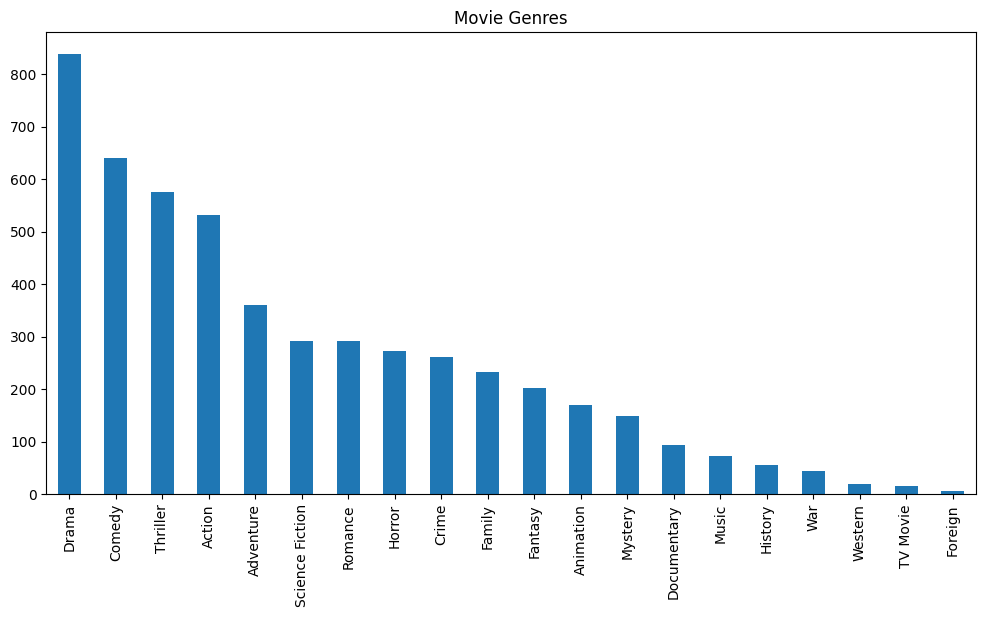

In [106]:
# Analyze movie genres
genre_df_counts.plot(kind="bar", figsize=(12,6), title = "Movie Genres")

Hence we can see that Drama is the most common movie genre produced, followed by Comedy and Thriller

### Question 2: Which movie genres have the highest average vote averages?

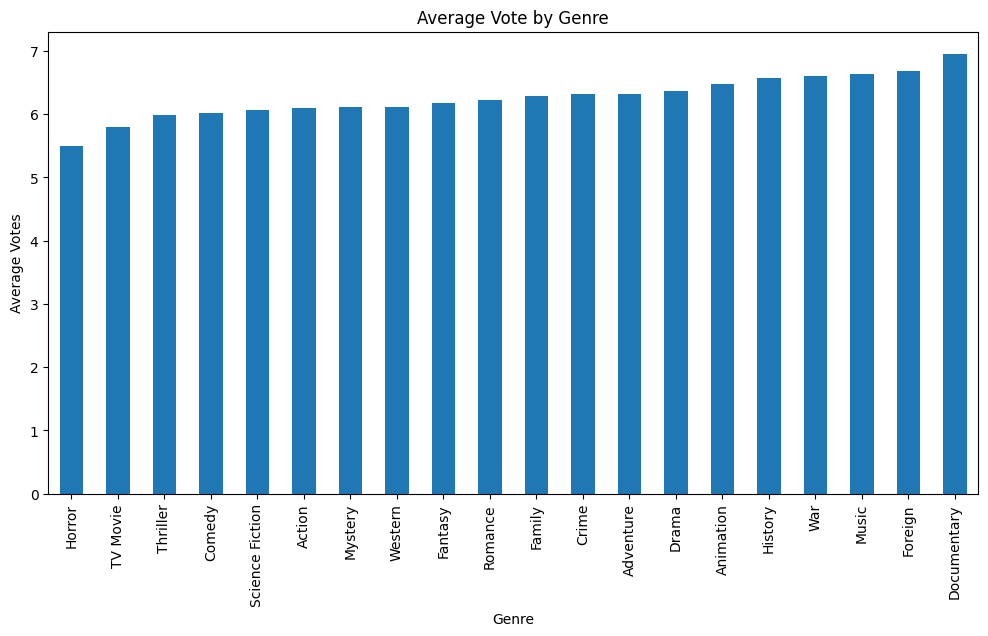

In [107]:
# Calculate average vote average by genre
genre_rating = df.explode("genres").groupby("genres")["vote_average"].mean()


genre_rating.sort_values().plot(kind='bar', figsize=(12, 6))
plt.xlabel("Genre")
plt.ylabel("Average Votes")
plt.title("Average Vote by Genre")
plt.show()

Documentary, Music, and Foreign movie genres tend to have the highest average votes.

### Question 3: Which genres tend to be more popular?

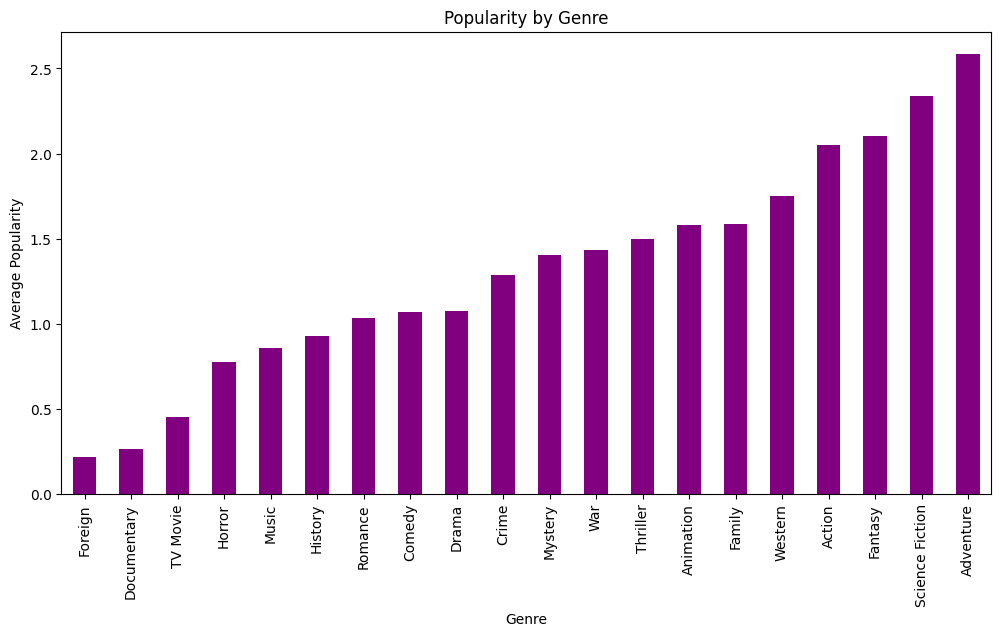

In [108]:
# Calculate average popularity by genre
genre_popularity = df.explode("genres").groupby("genres")["popularity"].mean()

plt.figure(figsize=(12, 6))
genre_popularity.sort_values().plot(kind="bar", figsize=(12, 6), color="purple")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.title("Popularity by Genre")
plt.show()

Adventure is the most popular movie genre followed by Science Fiction and Fantasy genre.

### Question 4: What are the trends in average movie ratings over the years?

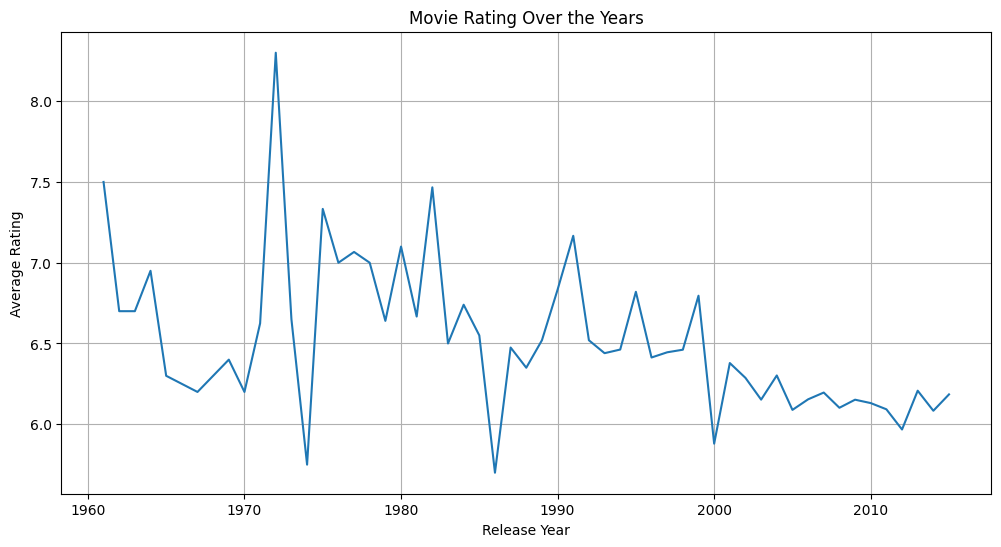

In [109]:
# Calculate average rating by year
avg_rating_by_year = df.groupby("release_year")["vote_average"].mean()


plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(kind="line", figsize=(12, 6))
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.title("Movie Rating Over the Years")
plt.grid(True)
plt.show()

The plot shows how the average movie ratings have varied over time. In the past 2 decades the average movie ratings have been between 6 and 6.5

### Question 5: How average movie budget has changed over the years?

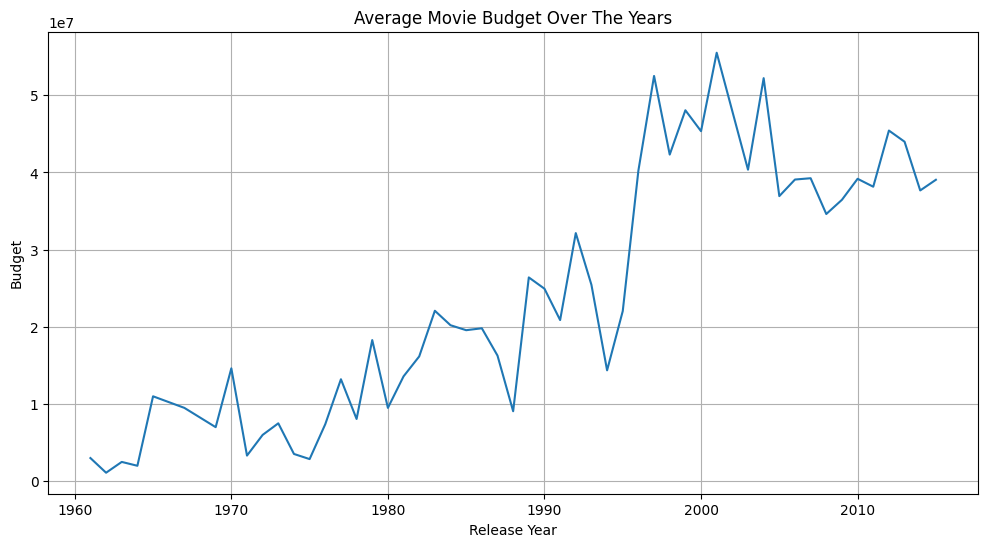

In [110]:
# Calculate average budget by year
avg_budget_by_year = df.groupby("release_year")["budget"].mean()

avg_budget_by_year.plot(kind="line", figsize=(12, 6))
plt.xlabel("Release Year")
plt.ylabel("Budget")
plt.title("Average Movie Budget Over The Years")
plt.grid(True)
plt.show()

The plot shows if there are particular years with higher average movie budgets. We can see that the average movie budgets have increased significantly over time, with a sharp rise in the past decade.

### Question 6: Identify variables that are related to the success of the movies

In [111]:
def scatter_chart(df, arg1,arg2, colors = "blue"):
    plt.figure(figsize=(12,10))
    plt.scatter(x=df[arg1],y=df[arg2],c=colors) #when you plot this chart instead ot [arg1] > "column_name"
    plt.title(f"The Relation Between {arg1.title()} and {arg2.title()}",fontsize=14) # instead of [arg2] > "column_name"
    plt.xlabel(f"{arg1.title()}",fontsize=12)
    plt.ylabel(f"{arg2.title()}",fontsize=14)
    plt.show()

### Q 6.1 How revenue and budget are related ?

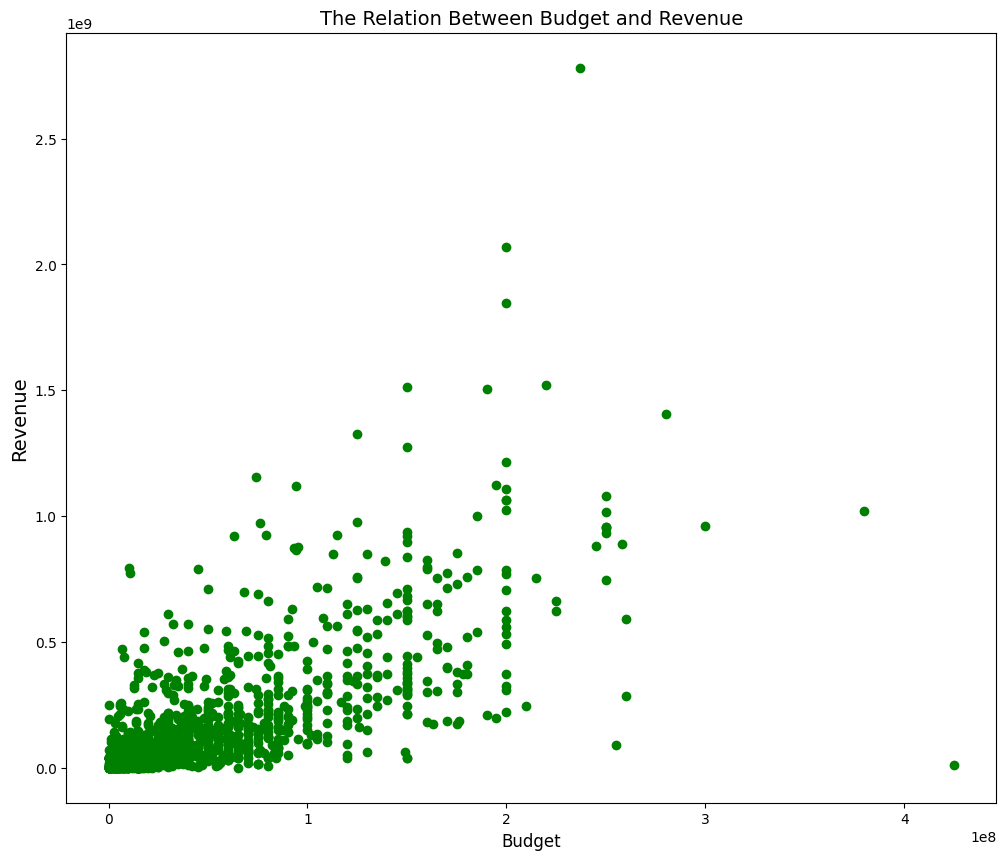

In [112]:
scatter_chart(df, "budget", "revenue", colors="green")

The plot indicates a strong positive relationship between budget and revenue this indicates that higher-budget movies tend to generate more revenue.

### Q 6.2 How revenue and vote average are related ?

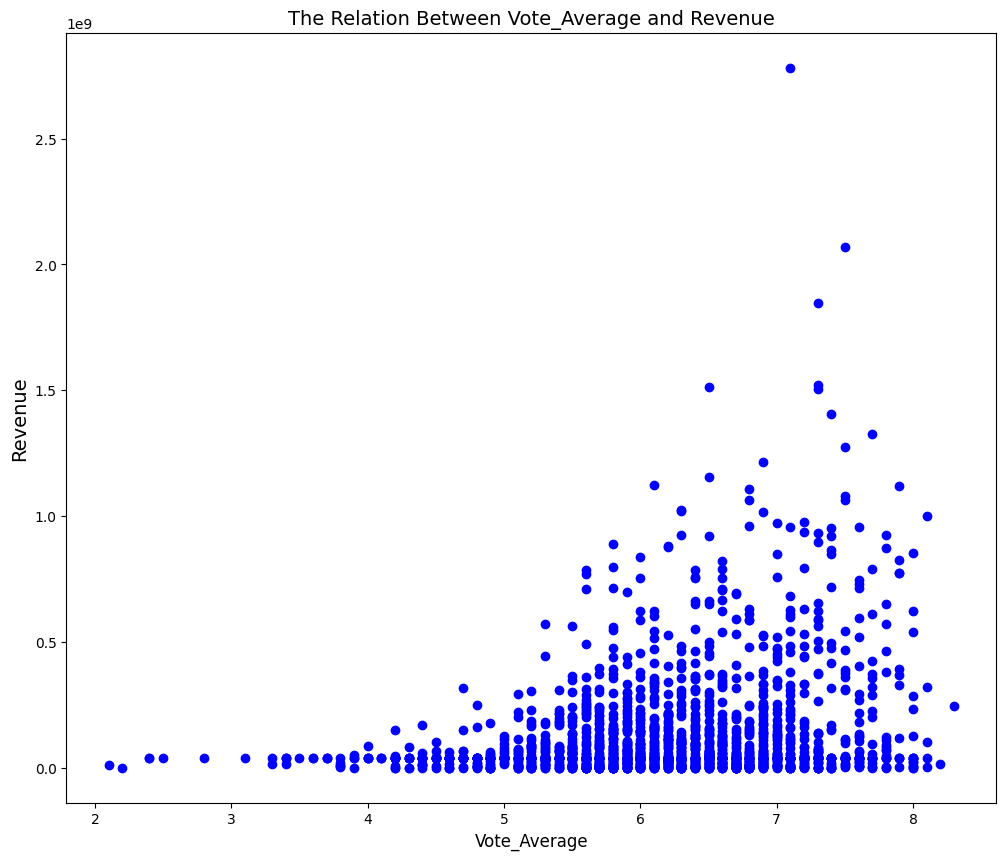

In [113]:
scatter_chart(df, "vote_average", "revenue", colors="blue")

Higher-rated movies have slightly higher revenues, but the relationship isn't strong.

### Q 6.3 Check if highly popular movies generate higher revenue

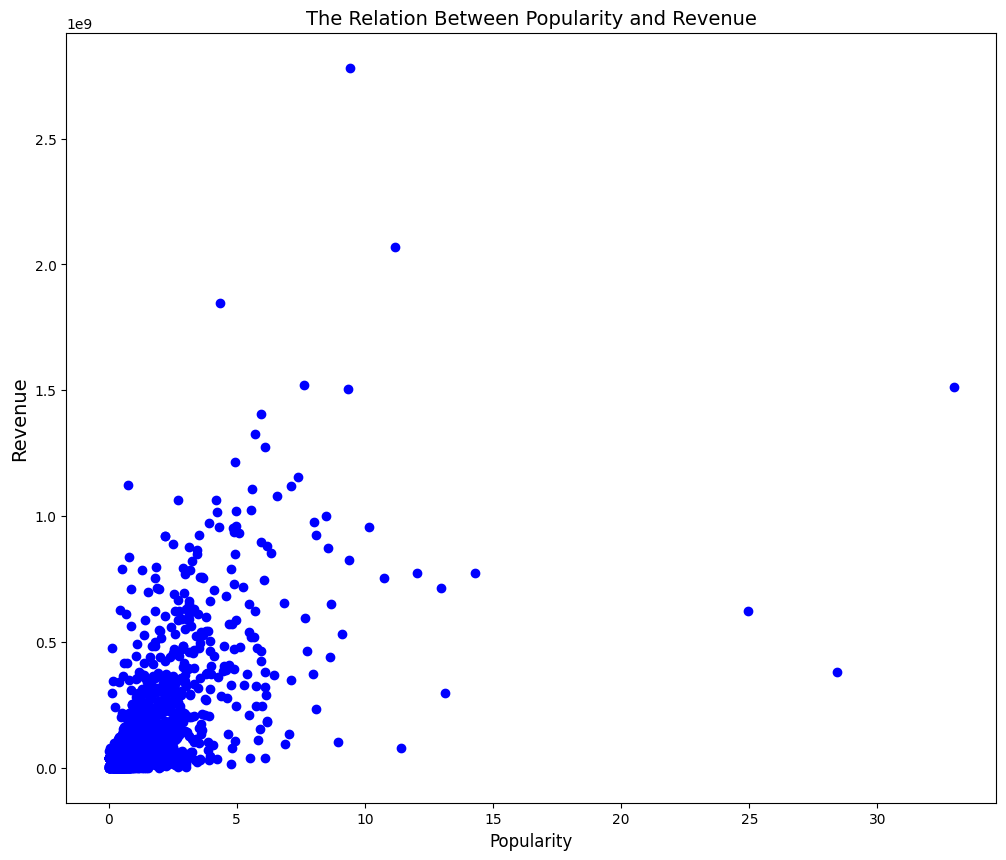

In [114]:
scatter_chart(df, "popularity", "revenue")

Movies with high popularity do not generate higher revenue, however moies with lower popularity have lower revenues.

### Q 6.4 Check if movie runtime have any impact on revenue

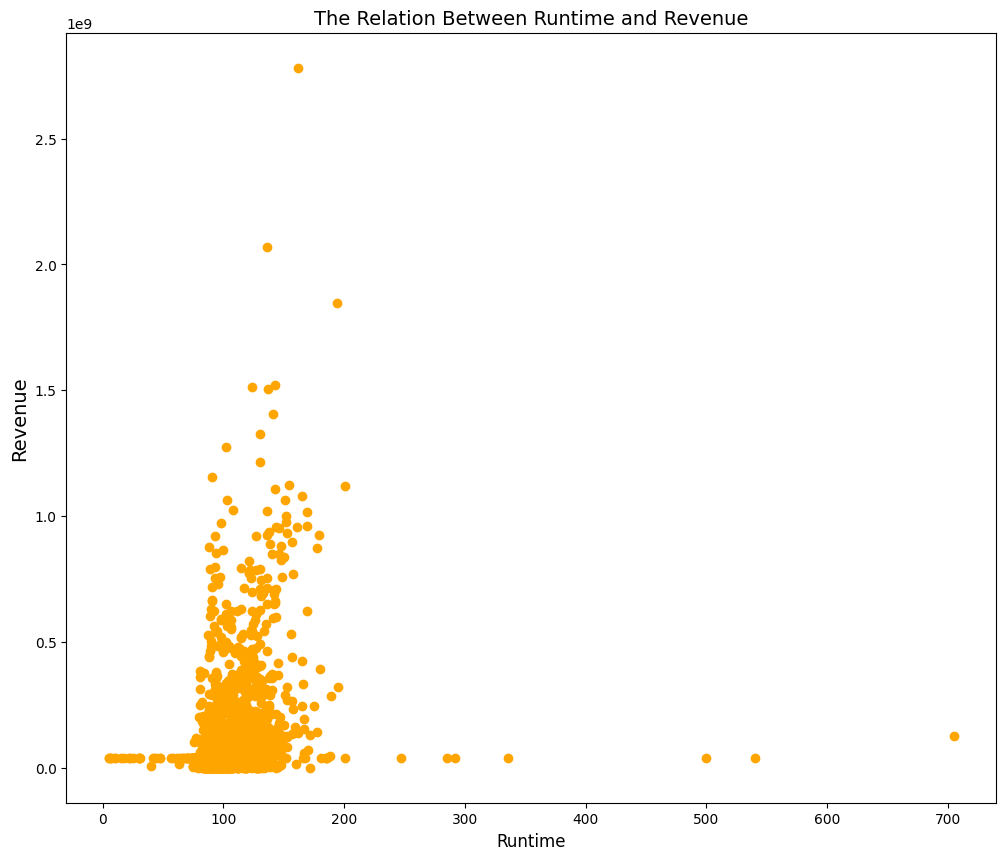

In [115]:
scatter_chart(df, "runtime", "revenue", colors="orange")

There is a not a strong correlation between runtime and revenue, however we can see longer movies have a slighly more revenue.

### Q 6.5. Do movies with higher ratings tend to be more popular ?

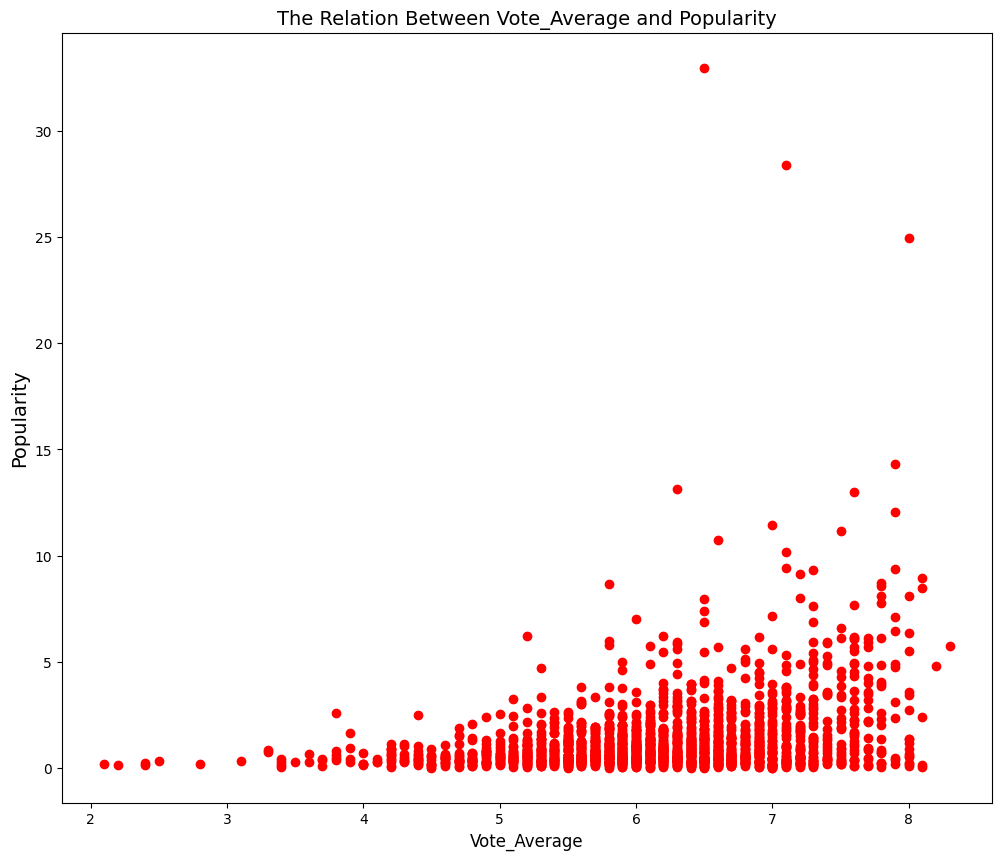

In [116]:
scatter_chart(df, "vote_average", "popularity", colors="red")

There is no strong correlation between a Higher voting average and the popularity of the movie, except a few outliers. Hence higher ratings does not indicate higher popularity of the movie.

<a id='conclusions'></a>
## Conclusions

> 1. Drama is the most commonly produced movie genre followed by comedy and thriller.
> 2. Despite Drama being the most produced genre, it was found that Adventure, Science Fiction, and Fantasy movies tend to be more popular with audiences.
> 3. Documentary, music, and foreign genres tend to have the highest average ratings.
> 4. Movie ratings have varied over several years, and movie ratings have remained between 6 and 6.5 over the last decade.
> 5. The average budget for movies have increased significantly over time.
> 6. Factors inflencing the movie success.
>> 1. There is a strong positive relationship between budget and revenue. Hence higher budget movies tend to make higher revenues.
>> 2. While higher rated movies tend to earn slightly more revenue, the relationship is not strong.
>> 3. Less popular movies tend to make less revenue.
>> 4. Runtime of the movies has a weak correlation with the revenue, with slighly longer movies generate more revenue
>> 5. The correlation between higher ratings and popularity is weak, hence higher rating does not necessarily mean higher popularity.
    
  
> One of the limitations of the dataset was lack of causation factors that can directly identify reasons that can predict higher revenues. Also, there movies are categorized in multiple genres, which presented challenges in analyzing genre specific trends.


## Submitting your Project 

In [117]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 970508 bytes to Investigate_a_Dataset.html
